In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Load the CSV file
df = pd.read_csv('../Data/raw_analyst_ratings.csv')

# Display the first few rows of the dataframe
df.head()


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [5]:
# Convert the date column to datetime
df['date'] = pd.to_datetime(df['date'], utc=True)

# Display the dataframe to ensure the date column is correctly converted
df.head()


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A


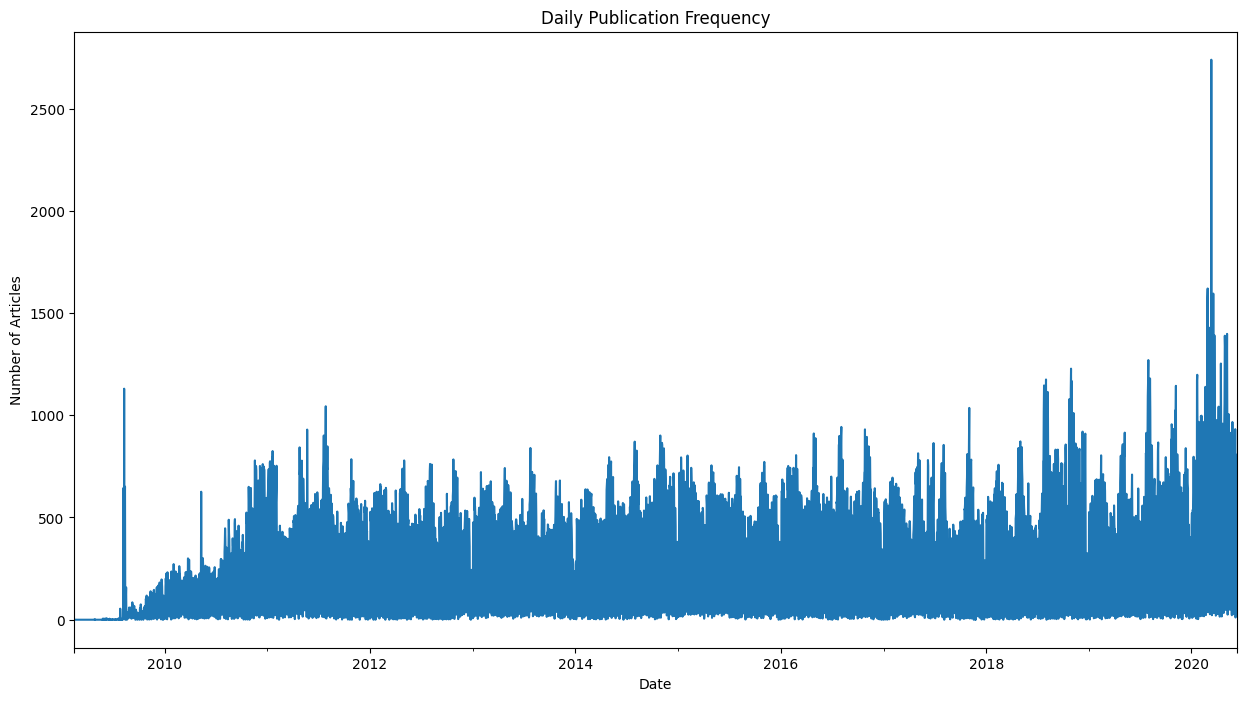

In [6]:
# Set the date column as the index
df.set_index('date', inplace=True)

# Resample the data by day to get the count of articles per day
daily_publications = df['headline'].resample('D').count()

# Plot the publication frequency over time
plt.figure(figsize=(15, 8))
daily_publications.plot()
plt.title('Daily Publication Frequency')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()


In [7]:
# Identify dates with spikes in publication frequency
spike_threshold = daily_publications.mean() + 2 * daily_publications.std()
spike_dates = daily_publications[daily_publications > spike_threshold]

# Display the dates with spikes
spike_dates


date
2009-08-10 00:00:00+00:00    1130
2011-05-23 00:00:00+00:00     930
2011-07-28 00:00:00+00:00    1044
2016-04-28 00:00:00+00:00     911
2016-08-04 00:00:00+00:00     943
                             ... 
2020-05-08 00:00:00+00:00     927
2020-05-13 00:00:00+00:00    1005
2020-05-18 00:00:00+00:00     914
2020-05-26 00:00:00+00:00     967
2020-06-05 00:00:00+00:00     932
Name: headline, Length: 93, dtype: int64

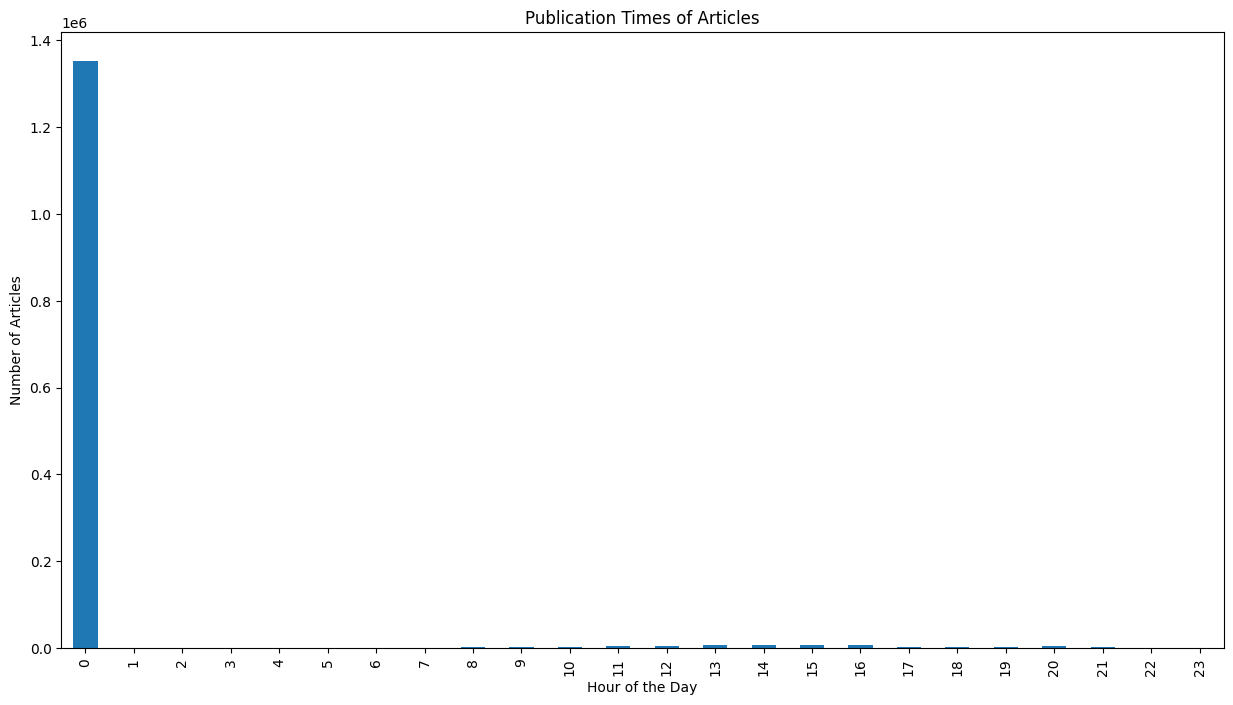

In [8]:
# Extract the hour from the datetime
df['hour'] = df.index.hour

# Count the number of articles published per hour
hourly_publications = df['hour'].value_counts().sort_index()

# Plot the publication times
plt.figure(figsize=(15, 8))
hourly_publications.plot(kind='bar')
plt.title('Publication Times of Articles')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Articles')
plt.show()
